# Tarea 1 Atro ML
### nombre: Aaron Vargas
### rut: 20011825-1
### rol: 201773076-5

Competencia de kaggle: [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data)

# Requerimientos
- pandas
- pyarrow
- matplotlib
- seaborn
- statsmodels

# Contexto

Este data set es producto del estudio de tendencias climáticas de un largo tiempo (1750 hasta 2016), que kaggle juntó de diversas fuentes y limpiados, y ajustados

Según se indica en la página de [kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data) la fuente de los datos, este dataset es una colleción de vaias otros dataset y archivos:
- NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut data sets
- estudio de Berkeley Earth , afiliado con Lawrence Berkeley National Laboratory, que combinó 16 archivos pre-existentes 

Los archvos diponibles son
- Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv) $\leftarrow$ con este trabajamos
- Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
- Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)
- Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)
- Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)

Algunas cosas a tener en cuenta:
- Los primeros datos, entre 1750 a 1850, fueron tomados usando **termómetros de mercurio**, los cuales tenían el problema de que estos son muy sensibles al "visit time" que afectaba a las mediciones. 
- 1940 la construcciones masivas como aeropuetos obligaron tener que mover varias estaciones meteorológicas.
- 1980 se hizo una actualización en la tecnología de los termómetros, los cambiaron termómetros electrónicos, los cuales tienen un **cooling bias** o sesgo de enfriamiento


# Descripción de datos

In [2]:
import pandas as pd
import pyarrow as pa

**Descripción de features**:
La descripción se obtiene de la página de kaggle donde está la competencia respectiva con la info de los datos: [link](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data)
- **dt**: Date, comienza desde 1750 "para el promedio de temperatura en tierra", y comienza de 1850 para el máximo y mínimo de temperatura en la tierra y para la temperatura del océano global y por último para la temperatura en la tierra (a demás del máximo y mínimo)
- **LandAverageTemperature**: Temperatura de la tierra global en celsius
- **LandAverageTemperatureUncertainty**: La incertidumbre de la medición, con el 95% de intervalo de confianza al rededor del promedio.
- **LandMaxTemperature**: Promedio de máxima temperatura global en celsius
- **LandMaxTemperatureUncertainty**: La incertidumbre de lo anterior
- **LandMinTemperature**: Promedio de la mínima temperatura global en celsius
- **LandMinTemperatureUncertainty**: Incertidumbre de lo anterior
- **LandAndOceanAverageTemperature**: Temperatura global promedio de la tierra y el océano en celsius
- **LandAndOceanAverageTemperatureUncertainty**: Incertidumbre  de lo anterior


In [3]:
# carga de datos
csv = "GlobalTemperatures.csv"
globalT = pd.read_csv(csv, dtype_backend="pyarrow")

Se analiza el dtype que tienen

In [4]:
globalT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype          
---  ------                                     --------------  -----          
 0   dt                                         3192 non-null   string[pyarrow]
 1   LandAverageTemperature                     3180 non-null   double[pyarrow]
 2   LandAverageTemperatureUncertainty          3180 non-null   double[pyarrow]
 3   LandMaxTemperature                         1992 non-null   double[pyarrow]
 4   LandMaxTemperatureUncertainty              1992 non-null   double[pyarrow]
 5   LandMinTemperature                         1992 non-null   double[pyarrow]
 6   LandMinTemperatureUncertainty              1992 non-null   double[pyarrow]
 7   LandAndOceanAverageTemperature             1992 non-null   double[pyarrow]
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   double[pyarrow]
dtypes: double

Vemos que `dt` es del tipo `string`, por lo que lo vamos a cambiar solo para más conveniencia a `datetime`

In [5]:
globalT["dt"] = pd.to_datetime(globalT["dt"])
globalT = globalT.set_index("dt").sort_index() # con esto la columna "dt" o date es el índice y permite mejor el acceso a las fechas
globalT = globalT.asfreq("MS") # se establece que la frecuencia es de por cada mes, util para rellenar datos, y hacer otras operaciones

In [6]:
globalT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Freq: MS
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype          
---  ------                                     --------------  -----          
 0   LandAverageTemperature                     3180 non-null   double[pyarrow]
 1   LandAverageTemperatureUncertainty          3180 non-null   double[pyarrow]
 2   LandMaxTemperature                         1992 non-null   double[pyarrow]
 3   LandMaxTemperatureUncertainty              1992 non-null   double[pyarrow]
 4   LandMinTemperature                         1992 non-null   double[pyarrow]
 5   LandMinTemperatureUncertainty              1992 non-null   double[pyarrow]
 6   LandAndOceanAverageTemperature             1992 non-null   double[pyarrow]
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   double[pyarrow]
dtypes: double[pyarrow](8)
memory usage: 227.6 KB


Ahora damos un vistazo a los datos

In [7]:
globalT.head(3)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1750-02-01,3.083,3.702,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1750-03-01,5.626,3.076,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Se observa muchos `NA` y que la feature **LandAverageTemperatureUncertainty** no tiene mucho sentido al ser casi igual a la medición del promedio. Se va a revisar si los últimos datos son mejores, porque quizás en 1750 la medición era muy mala

In [8]:
globalT.tail(3)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2015-10-01,10.801,0.102,16.45,0.059,5.232,0.115,16.29,0.062
2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
2015-12-01,5.518,0.1,10.725,0.154,0.287,0.099,14.774,0.062


Se observa que la incertidumbre es mucho más pequeña, ya que de seguro eran mejores las mediciones.

Dada la cantidad de `NA` visto antes, se revisará el total. Vamos a comprobar el total.

In [9]:
globalT.shape

(3192, 8)

Podemos veer que hay un total de `3192` instacias, con `8` features, o realmente `9` considerando el `dt` puesto como índice

`.count()` cuenta la cantidad de datos no NA o nulos o null etc. Será útil para conocer la cantidad de `NA`

In [10]:
globalT.shape[0] - globalT.count()

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

Al restar al total el `.conut()` obtenemos el total de NA, la cual es de `1200` en el peor caso. Según la descripción de features, se tiene que desde el año 1750 hasta 1850 solo se tenía lso datos de las 2 primeras features. Esto puede explicar por qué hay tantos NA. 

Se comprobará el total, y se verá si hay más NA luego de 1850.


In [11]:
# datos totales entre 1750 y 1850, son 1200 NA para las demas features, entonces no hay mas NA que estos
print((1850-1750)*12)

1200


In [12]:
# se saca solo el año para poder filtrar
globalT["1849-10":"1850-03"].head(6)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1849-10-01,8.89,0.733,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1849-11-01,5.778,1.313,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1849-12-01,1.923,0.908,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.97,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.41,14.043,0.341


Con esto vemos que precisamente los `NA` son princpalmente entre 1750 a 1850. pero vamos a precisar cuántos

In [13]:
# 1849 considera los 12 meses de ese año
print( globalT[:"1849"].shape )
print(globalT[:"1849"].count())
print( globalT[:"1849"].shape[0] - globalT[:"1849"].count() )

(1200, 8)
LandAverageTemperature                       1188
LandAverageTemperatureUncertainty            1188
LandMaxTemperature                              0
LandMaxTemperatureUncertainty                   0
LandMinTemperature                              0
LandMinTemperatureUncertainty                   0
LandAndOceanAverageTemperature                  0
LandAndOceanAverageTemperatureUncertainty       0
dtype: int64
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


En este resultado vemos que los `12 NA` de los dos primeros features y los `1200 NA` de los otros features son todos entre los años $ 1750\to 1850 $. 
Esto indica que los datos de desde la 4ta feature en adelante no es necesario rellenar, porque simplemente no hay conocimiento de estos entre este rango de fechas. Sin embargo los `12 NA` de las dos primeras features, **LandAverageTemperature** y **LandAverageTemperatureUncertainty**, sí son candidatos para rellenar. Por lo que debemos revisar su distribución. Aunque quizás a la larga no sea muy útil ya que la incertidumbbre inicial es muy grande. Para saber si será útil, sería bueno graficarlo para ver los demás datos. También hay que considerar que los datos se tomaron por **cada mes**, y los `12 NA` son instancias que faltan **completas**, es decir, que no tienen **ningún dato** en su fila, lo que indica que también podría quitarse simplemente.

Algunas alternativas son:
- Quitarlas simplemente
- Rellenarlas tomando el punto siguiente y el anterior y sacar el punto medio, ya que son datos de temperatura, que siguen ciclos
- En útimo caso usar la distribución de los datos, lo cual no es óptimo, y no es muy buena idea, ya que la temperatura va según un ciclo, y de seguro tiene un comportamiento continuo. Si se reemplaza por un valor de la distribución, tendría sentido con la misma distribución, pero se perdería la información que hay en el paso del tiempo de manera local. Es como si pusiera la temperatura de verano en una estación de invierno.

Por otro lado, según el contexto hay otras incidencias para `1940` por el cambio de estaciones meteorológicas, y para `1980` el cambio de termómetros de mercurio a electrónicos. Se visualizarán los datos para ver si están bien para esas fechas.

In [14]:
globalT["1940":"1979"].head(4)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1940-01-01,2.335,0.2,7.942,0.219,-3.35,0.256,13.576,0.12
1940-02-01,3.423,0.204,9.25,0.242,-2.488,0.243,13.932,0.116
1940-03-01,5.424,0.18,11.402,0.174,-0.622,0.198,14.48,0.115
1940-04-01,8.756,0.247,14.793,0.252,2.722,0.258,15.452,0.125


In [15]:
globalT["1980":].head(4)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1980-01-01,2.956,0.087,8.468,0.08,-2.457,0.124,13.812,0.049
1980-02-01,3.652,0.099,9.26,0.129,-1.864,0.115,14.112,0.05
1980-03-01,5.367,0.103,11.24,0.16,-0.379,0.126,14.646,0.052
1980-04-01,8.935,0.106,14.821,0.129,3.109,0.175,15.578,0.052


In [16]:
import seaborn

<Axes: xlabel='dt', ylabel='LandAverageTemperatureUncertainty'>

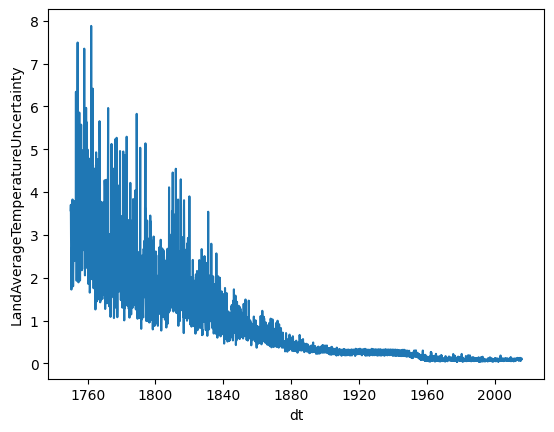

In [17]:
seaborn.lineplot(globalT,x="dt", y="LandAverageTemperatureUncertainty" )

<Axes: xlabel='dt', ylabel='LandAverageTemperatureUncertainty'>

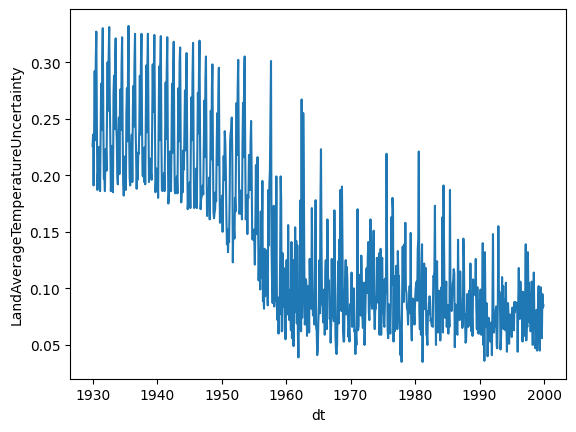

In [18]:
seaborn.lineplot(globalT["1930":].head(12*70),x="dt", y="LandAverageTemperatureUncertainty" )

<Axes: xlabel='dt', ylabel='LandAverageTemperature'>

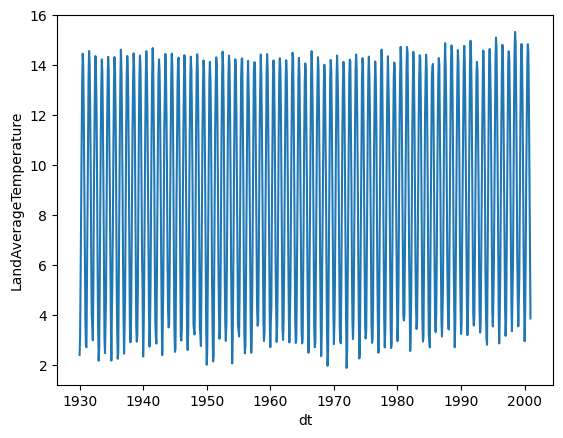

In [19]:

seaborn.lineplot(globalT["1930":"2000"],x="dt", y="LandAverageTemperature" )

Como vemos en los datos, se ve que el comportamiento es cíclico, tanto para la incertidumbre como la temperatura. La temperatura se ve que va aumentando, pero esto requiere más análisis. En cuanto a la incertidumbre, se ve que desde 1940 este empieza a bajar fuertemente. Se ve que es estable antes de bajar, luego cuando baja, lo hace pero tiene mucho ruido.
Según la página de kaggle, estos datos ya se encuentran procesados, lo que puede haber incluido sesgos.
De la página [skepticalscience](https://skepticalscience.com/truth-about-temperature-data.html?utm_source=chatgpt.com) se explica varias razones que pueden afectar al ruido de los datos.
- Sesgos de los instrumentos, tipo de termómetro, aparatos distintos, como boyas, satélites, etc
- Alteración en la hora a la que se tomó el dato
- Cambios en la ubicación en donde se tomó el dato
- Algunos instrumentos tienen más ruido que otros
También explica que se puede reducir la incetidumbre considerando estos aspectos, y comparando datos con otras estaciones cercanas.
En comparación, la incertudumbre entre 1930 hasta 1990 con la incertudumbre inicial de 1750 a 1840, se ve que es muy poca. Una de las razones de por qué en el periodo 1860 a 1940 era tan estable, puede ser porque se habría masificado la canidad de estaciones meteorológicas, pero actualmente muchas de estas pueden haber sido movidas, y hay nuevas fuentes de datos introducidas (con nuevos instrumentos) que tienen una incertidumbre elevadas.

Ahora vamos a ver cuáles son los NA específicamente, para ver si pueden ser facilmente reeplazados, eliminados, etc

In [20]:
globalT[globalT["LandAverageTemperature"].isna()]

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-11-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1751-05-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1751-07-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1751-10-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1751-11-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1751-12-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1752-02-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1752-05-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1752-06-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Como las 12 mismas intancias de **LandAverageTemperature** tienen NA tanto para LandAverageTemperature, y a la vez también tienen NA para LandAverageTemperatureUncertainty, significa que no hay otras NA, significa que para esos mesesfaltaaron ambos datos.
- Se observa que hay algunos meses faltantes que son consecutivos (largo 3), y otros son puntuales.
- Como son pocos datos se podría simplemente quitar
- Por otro lado, como algunos son consecutivos, tal vez podría ser bueno reemplazarlos.

# Limpieza de datos

Se usó el métdo `interpolate` de pandas para rellenar los NA
- [función interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate)
- Se úsa el método ``time`` para interpolate. Esto es casi lo mismo que el método de interpolación `lineal`, pero este funciona para índices del tipo dataframe.

Para la descomposición se usó la información obtenida de los siguientes videos:
- [Descomposición de serie de tiempo en trend, seasonal, y resid](https://www.youtube.com/watch?v=XZfgw6OniHg&t=512s)
El objetivo de esta descomposición es analizar la tendencia de los datos a parte de la estacioanlidad, que no permitía ver si aumentaban

La indentificación de `NA` ya se realizó previamente.

In [21]:
# rellena los NA y los NA si están en los extremos (opción "both")
rellenar = ["LandAverageTemperature", "LandAverageTemperatureUncertainty"]
globalT[rellenar] = globalT[rellenar].interpolate(method="time", limit_direction="both")

In [22]:
print(globalT.count())
print(globalT.shape)

LandAverageTemperature                       3192
LandAverageTemperatureUncertainty            3192
LandMaxTemperature                           1992
LandMaxTemperatureUncertainty                1992
LandMinTemperature                           1992
LandMinTemperatureUncertainty                1992
LandAndOceanAverageTemperature               1992
LandAndOceanAverageTemperatureUncertainty    1992
dtype: int64
(3192, 8)


Se ve que los 12 NA ya fueron rellendos

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

Se va a descomponer los datos para ver la tendencia, la estacionalidad, y el error. Esto puede ayudar para el análisis de outliers

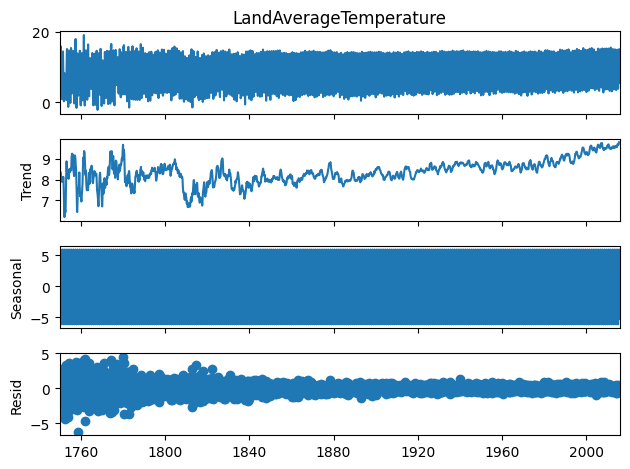

In [24]:
"""
- El primer gráfico son los datos directamente que les pasé, globaT[feature]
- Trend es la tendencia de los datos, en este caso se ve que aumenta
- Seasonal es el patrón cíclico si es que existe. En este caso sí existe, la temperaturabaja y sube constantemente
- Resid es el error aleatorio o de eventos puntuales sobre la estacionalidad y la tendencia
"""
feature = "LandAverageTemperature"
decompose = seasonal_decompose(globalT[feature], model="additive", period=12)
decompose.plot();

Para ver la estacionalidad mejor, se mostrará a continuación un rango de tiempo más pequeño para apreciarlo mejor

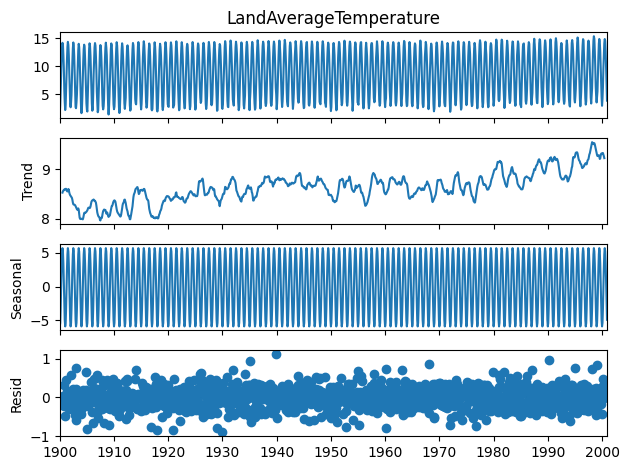

In [25]:
decompose2 = seasonal_decompose(globalT.loc["1900":"2000" , feature], model="additive", period=12)
decompose2.plot();

El residuo básicamente reprensenta los valores que no pudieron ser explicados, son un error aleatorio o por algún evento en particular. Con esto podemos hacer un análisis de outliers y ver si hay datos raros

Se usa el [z-score](https://www.simplypsychology.org/z-score.html) para ver si hay algún outlier según el error que tenemos.

In [26]:
resid = decompose.resid # residuo de la grafica
mean = resid.mean()
std = resid.std()
z = (resid - mean) / std # z score

In [27]:
outliers = resid[z > 3]
outliers.index = pd.to_datetime(outliers.index)
print(outliers.shape)
print(outliers.head(3))
print(outliers["1850":])

(39,)
dt
1752-03-01    2.899027
1752-11-01    3.391138
1752-12-01    3.248211
Name: resid, dtype: float64
Series([], Name: resid, dtype: float64)


Se detectan ``39`` outliers en el rango 1750 a 1850. Esto tiene sentido dado a que la feature **LandAverageTemperatureUncertainty** tiene valores altos para este rango. Como se mecionaron en los primeros análisis, esto es principalmente porque en las primeras mediciones no habián muchas estaciones climáticas, con termómetros de mercurio, diferentes bias no tratados, etc. Lo cual cambia ya posterior para la fecha de 1850 que ya habían más métodos para reducir mejorar las mediciones. 
- Como la incertidumbre es tan alta inicialmente, esto hace que cualquier posible outlier futuro no se note, ya que estos datos son demasiados altos.
- Esto indica que hay muchos datos que no son tan confiables en las primeras mediciones. Estos datos podrías descartarse dependiendo qué se quiera hacer con ellos, si se quiere predecir la temperatura global el siguiente año, quizás no sea necesario incluir datos tan antiguos.
- Para mejorar el análisis de outliers, se podría dividir en 2 o más intervalos, por ejemplo, de 1750 a 1850, y de 1850 hasta el final, sin embargo, la incertidumbre cae de manera exponencial, y podrían haber otros outliers ocultos

Para resolver el problema anterior, se intentará usar boxplot por cada 40 años para analizar los outliers, así evitamos que outliers anteriores cubran outliers nuevos

El método es tomado desde esta [fuente](https://www.kaggle.com/code/sonialikhan/climate-change-earth-surface-temperature-data?scriptVersionId=179816491&cellId=21) pero el código no, porque solo pasa 1 punto por boxplot.

In [28]:
from matplotlib import pyplot as plt

In [ ]:
def plot_boxplots(data, feature, ylabel, title, year_init=1750, year_f=2015, interval=40, log_scale=False, show_points=False):
    df = data[[feature]].copy()
    # rangos de tiempo
    years = pa.concat_arrays( [pa.arange(year_init, year_f, interval), pa.array([year_f])])
    labels = [f'{years[i]}-{years[i+1]}' for i in range(len(years)-1) ] # ej: [1750-1790, ...]
    # se agrupan los datos por rango
    tag = "intervalos"
    df[tag] = pd.cut(df.index.year, bins=years, labels=labels) #https://www.youtube.com/watch?v=MJt6NotH4fY

    #boxplot
    fig, ax = plt.subplots(figsize=(8,4))
    seaborn.boxplot(
        data=df,
        x=tag,
        y=feature,
        order=labels,
        log_scale=log_scale
    )
    #puntos del boxplot
    if show_points:
        seaborn.stripplot(
            data=df,
            x=tag,
            y=feature,
            order=labels,
            log_scale=log_scale,
            color=".3"
        )
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

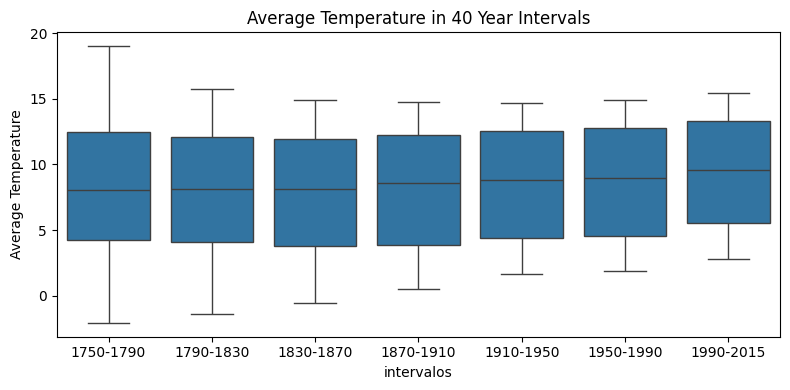

In [30]:
plot_boxplots(
    data=globalT,
    feature="LandAverageTemperature", 
    ylabel="Average Temperature", 
    title="Average Temperature in 40 Year Intervals"
    )

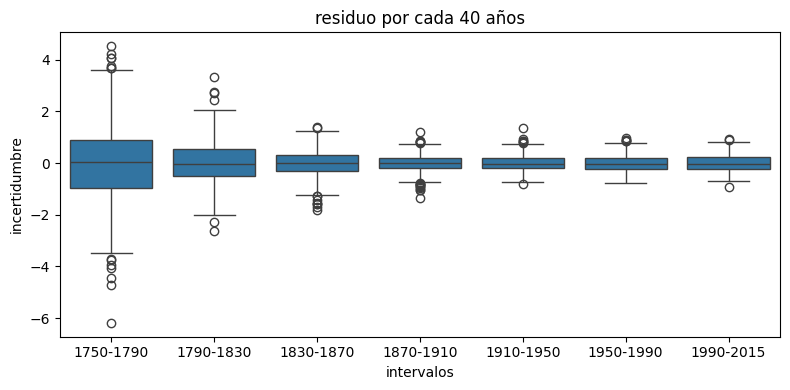

In [31]:
resid_df = decompose.resid.dropna().to_frame(name="resid")

plot_boxplots(
    data=resid_df,
    feature="resid",
    ylabel="incertidumbre",
    title="residuo por cada 40 años"
)

Contando al ojo se ven como $\approx 44$ outliers, similar a lo contado antes. Lo bueno es que estos outliers van disminuyendo.

Ahora se van a analizar otros outliers de las demás features

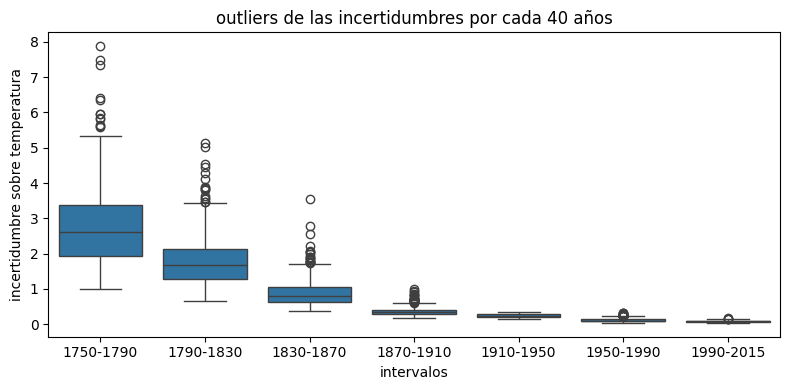

In [32]:
plot_boxplots(
    data=globalT,
    feature="LandAverageTemperatureUncertainty",
    ylabel="incertidumbre sobre temperatura",
    title="outliers de las incertidumbres por cada 40 años",
)

Recordando, lal incertidumbre disminuye de manera exponencial. Por lo que quizás un análisis activando la escala logaritmica podría mostrarlo mejor los outliers que hay.

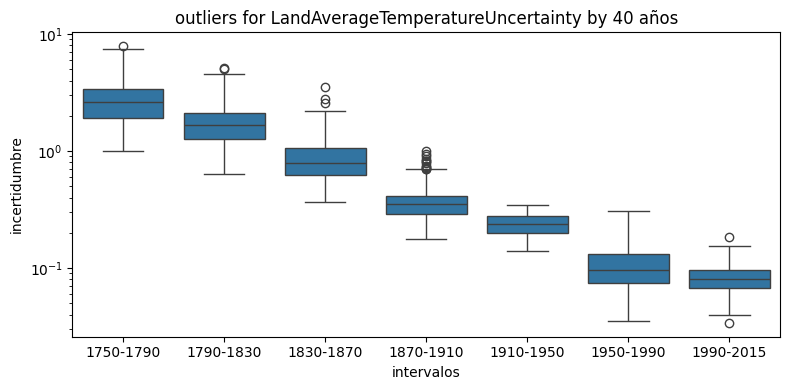

In [33]:
plot_boxplots(
    data=globalT,
    feature="LandAverageTemperatureUncertainty",
    ylabel="incertidumbre",
    title="outliers for LandAverageTemperatureUncertainty by 40 años",
    log_scale=True
)

Si bien, los datos iniciales de la incertidumbre son bastante ruidosos, es dificil identificar qué es un outlier en los primeros 40 años, por lo que esta representación es más adecuada considerando el ruido para esa época.

Ahora haremos el mísmo análisis para las demás features

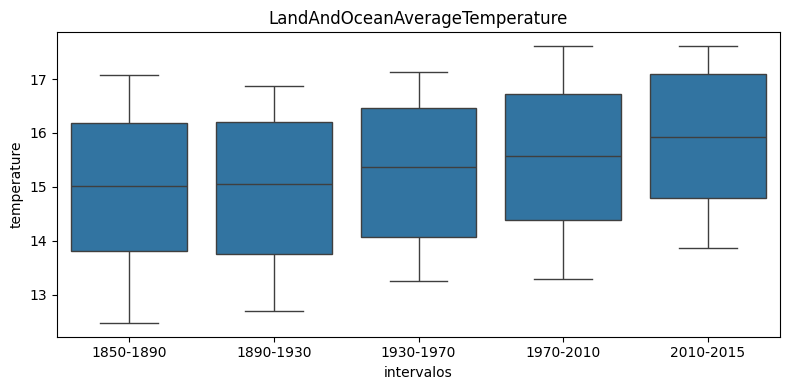

In [34]:
plot_boxplots(
    data=globalT,
    feature="LandAndOceanAverageTemperature",
    ylabel="temperature",
    title="LandAndOceanAverageTemperature",
    year_init=1850
)

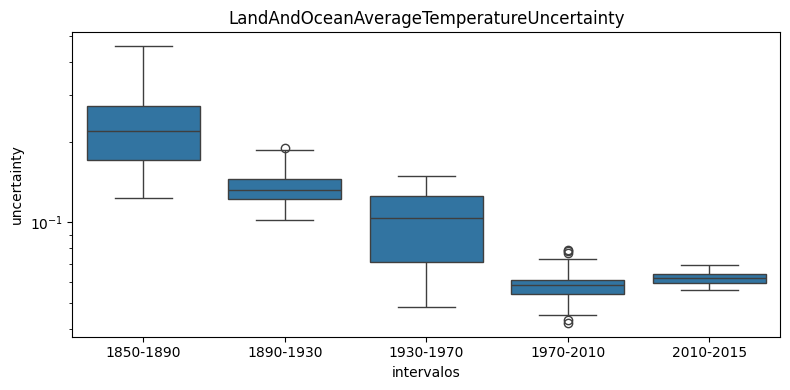

In [35]:
plot_boxplots(
    data=globalT,
    feature="LandAndOceanAverageTemperatureUncertainty",
    ylabel="uncertainty",
    title="LandAndOceanAverageTemperatureUncertainty",
    year_init=1850,
    log_scale=True
)

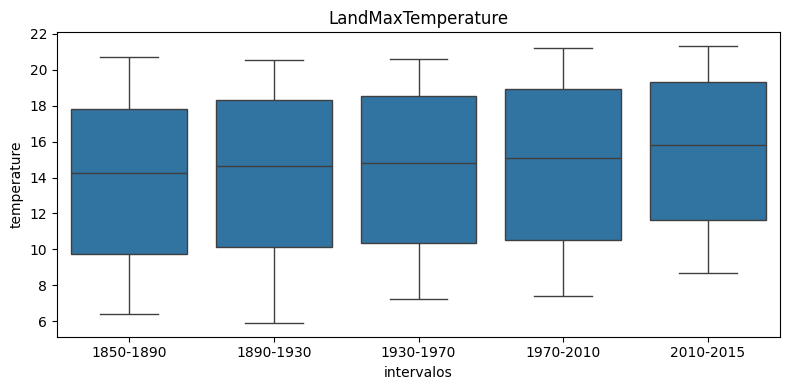

In [36]:
plot_boxplots(
    data=globalT,
    feature="LandMaxTemperature",
    ylabel="temperature",
    title="LandMaxTemperature",
    year_init=1850
)

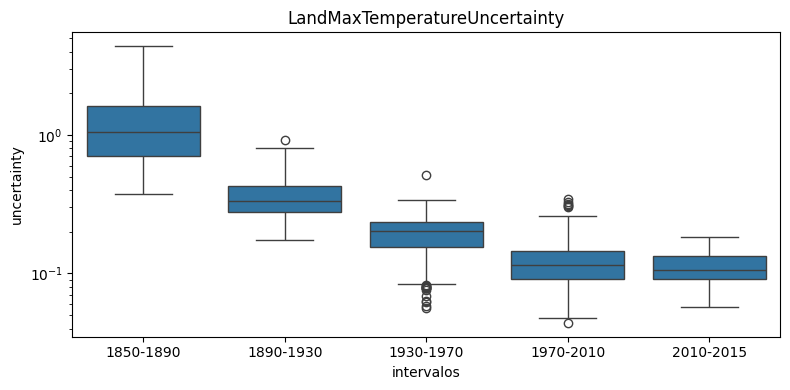

In [37]:
plot_boxplots(
    data=globalT,
    feature="LandMaxTemperatureUncertainty",
    ylabel="uncertainty",
    title="LandMaxTemperatureUncertainty",
    year_init=1850,
    log_scale=True
)

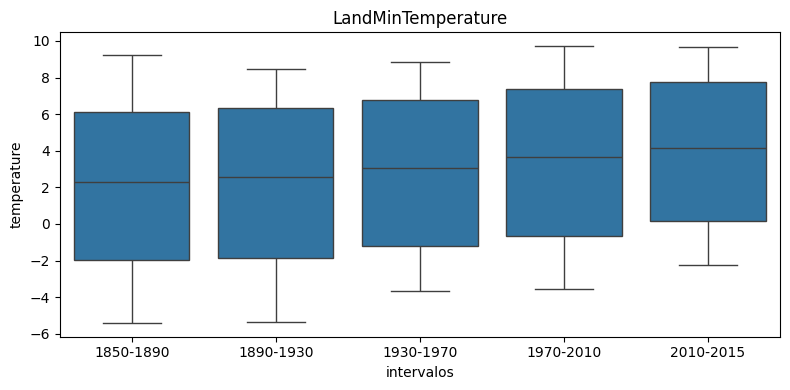

In [38]:
plot_boxplots(
    data=globalT,
    feature="LandMinTemperature",
    ylabel="temperature",
    title="LandMinTemperature",
    year_init=1850
)

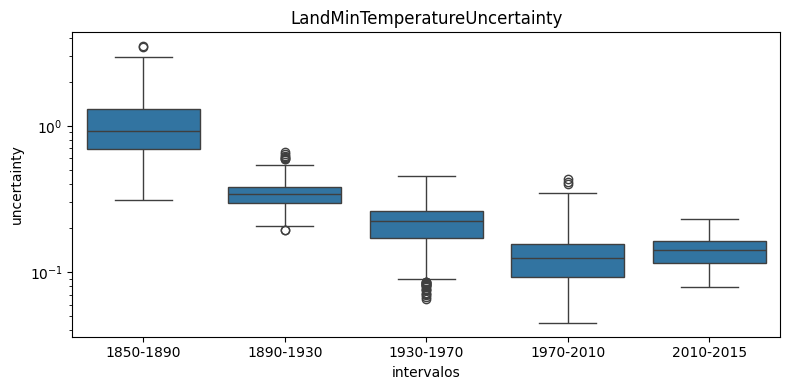

In [39]:
plot_boxplots(
    data=globalT,
    feature="LandMinTemperatureUncertainty",
    ylabel="uncertainty",
    title="LandMinTemperatureUncertainty",
    year_init=1850,
    log_scale=True
)

**Conclusiones sobre outliers**
- Lo bueno de estos datos, es que los outliers van disminuyendo en cantidad en cada tramos, en los datos de incertidumbre
- No hay outliers en los datos de temperatura normales (los que no son de incertidumbre)
- Por otro lado, las datos de temperatura en tierra, en tierra y mar, y temperaturas máximas y mínimas, ninguna parece tener outliers. Eso no significa que no tengan cierto ruido, con el método de descomposición se puede obtener, significa que incluyendo el ruido, todo parece ir dentro de lo normal, incluso para los tramos de tiempo con alta incertidumbre.
- Que los datos de temperatura (no los de incertiumbre) no tengan outliers, incluyendo las altas incertidumbres iniciales, es muy bueno, ya que signifca que los datos han sido bien trabajados, y han compensado bien la alta incertidumbre.
- Si se requiere hacer un modelo de predicción en base a esta serie de tiempo, los outliers pueden afectar. Pero los datos de temperatura no tienen outliers aparentes, por lo que se pueden usar perfectamente. Y la incertidumbre no son necesarios para un trabajo de predicción, solo indica que no se pueden confiar mucho en ellos, pero son suficientes para el modelo para que tenga un contexto previo a los datos finales que tiene buena incertidumbre para hacer buenas predicciones.
- Los outliers tiene la ventaja de que se puedan aprovechar para análisis de comportamiento de la temperatura en eventos especiales y poco frecuentes, para ver cómo afectan. Poder indentificar estos outlier y porder asociarlos con eventos históricos, puede aportar gran valor para medir el impacto de eventos futuros.

# Análisis estadísticos

In [40]:
""" no va a considerar las filas con los datos NA entre los rangos de 1750-1850,
 por lo que no es necesario hacer el filtro para tener bien las estadístisca"""
globalT.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192.0,3192.0,1992.0,1992.0,1992.0,1992.0,1992.0,1992.0
mean,8.371253,0.94527,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.377294,1.100319,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.08,0.034,5.9,0.044,-5.407,0.045,12.475,0.042
25%,4.32175,0.187,10.212,0.142,-1.3345,0.155,14.047,0.063
50%,8.5895,0.3945,14.76,0.252,2.9495,0.279,15.251,0.122
75%,12.547,1.43725,18.4515,0.539,6.77875,0.45825,16.39625,0.151
max,19.021,7.88,21.32,4.373,9.715,3.498,17.611,0.457


Las features más relevantes, basicamente para un modelo de predicción, serían las features:
- LandAverageTemperature
- LandAndOceanAverageTemperature
- LandMaxTemperature
- LandMinTemperature
En cuanto a las incertidumbre, no aportaría ningún valor para las predicciones, ya que no aportan información ni valor alguno para la secuencias de temperaturas.

In [41]:
# https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
def plot_distribution(data, feature, ylabel, title, ystep=20, ystart=1750, yend=2015):
    df = data.copy()
    years = pa.arange(ystart, yend, ystep)
    if yend not in years:
        years = pa.concat_arrays([years, pa.array([yend])])
    labels = [f"{years[i]}-{years[i+1]}" for i in range(len(years)-1)]

    tag = "intervalo"
    df[tag] = pd.cut( df.index.year, bins=years, labels=labels )
    
    # displot o gráfica de distribuciones
    seaborn.displot(
        data=df,
        x=feature,
        hue=tag,
        kind="kde"
    )
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

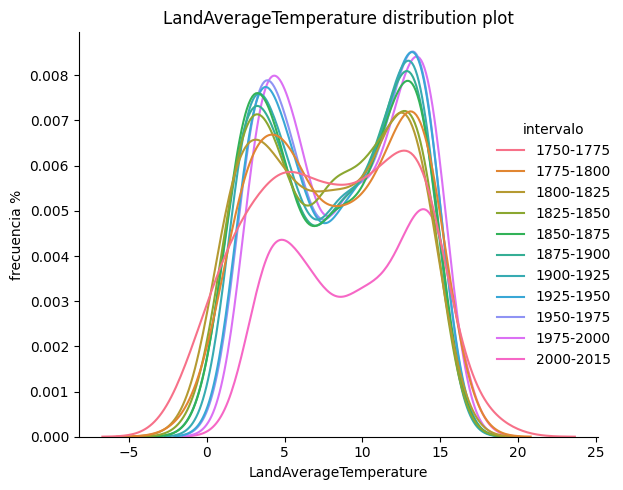

In [42]:
feature="LandAverageTemperature"
plot_distribution(
    data=globalT,
    feature=feature,
    ylabel="frecuencia %",
    title=f"{feature} distribution plot",
    ystep=25
)

Aquí vemos el gráfico de distribución de LandAverageTemperature. Se observan **dos picks**. Esto es debido a que hay **estacionalidad anual** en la serie de tiempo, en dónde baja y vuelve a subir la temperatura en un mismo año. 

Se observa que a través de los años, ambos picks de temperatura se **desplazan a la derecha** levemente, lo que indica un aumento de la temperatura.
La última línea se ve más pequeña o baja debido a que tiene poca frecuencia, ya que abaerca solo 15 años de los 25 años puestos en `ystep`. Sin embargo, lo que importa, es cómo se desplaza horizontalmente, y los picks.

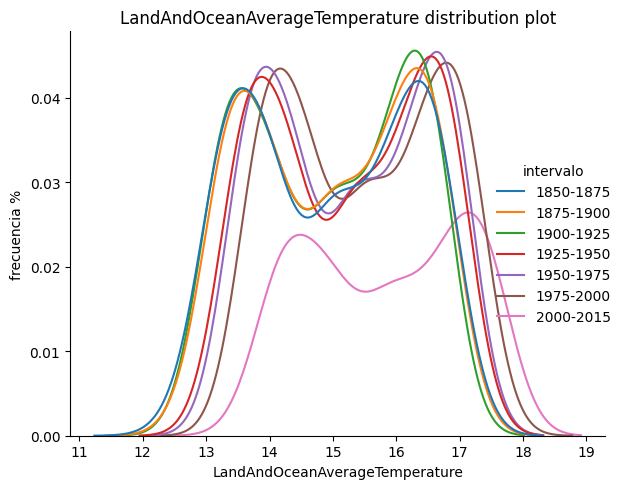

In [43]:
feature="LandAndOceanAverageTemperature"
plot_distribution(
    data=globalT["1850":],
    feature=feature,
    ylabel="frecuencia %",
    title=f"{feature} distribution plot",
    ystep=25,
    ystart=1850
)

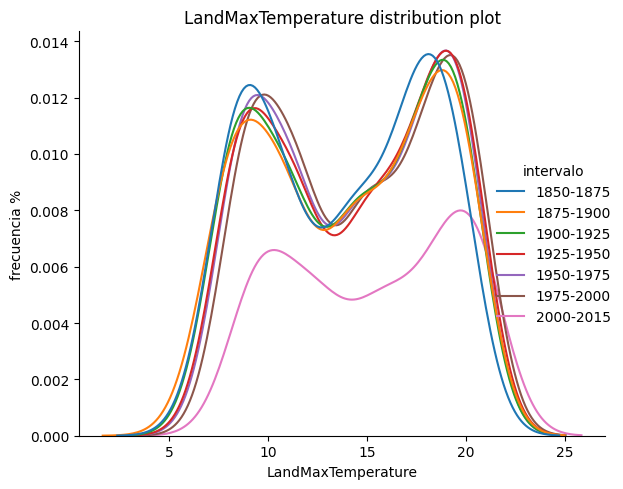

In [44]:
feature="LandMaxTemperature"
plot_distribution(
    data=globalT["1850":],
    feature=feature,
    ylabel="frecuencia %",
    title=f"{feature} distribution plot",
    ystep=25,
    ystart=1850
)

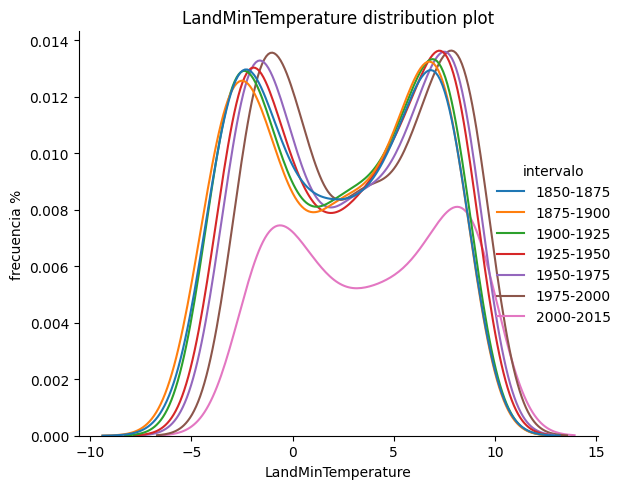

In [45]:
feature="LandMinTemperature"
plot_distribution(
    data=globalT["1850":],
    feature=feature,
    ylabel="frecuencia %",
    title=f"{feature} distribution plot",
    ystep=25,
    ystart=1850
)

Se observa que todos los features tienen la misma tendencia a desplazarse hacia la derecha. Básicamente también van aportando la misma información.

Acordándonos de la descomposición de LandAverageTemperature, se puede hacer algo interesanto con el residuo, se puede graficar y ver si es **ruido blanco** o no. Si es blanco, significa que el modelo predició todo lo que tenía que predecir de la serie de tiempo, y el rudio es completamente aleatorio y no tienen ninguna estructura. Esto se puede observar si la distribución es centrada en 0, y con comportamiento normal, lo cual se ve en el siguiente gráfico.

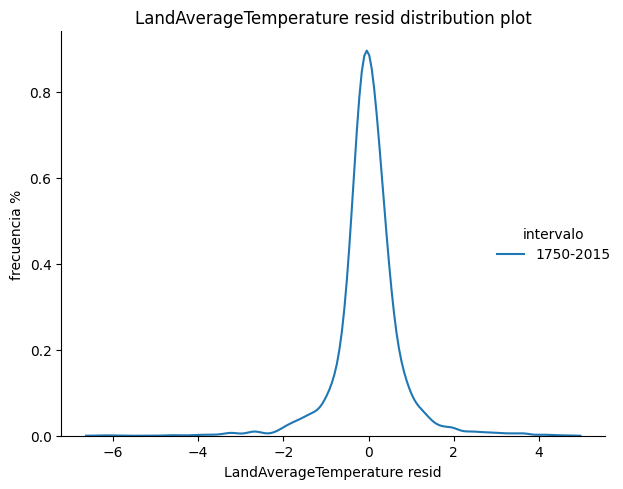

In [46]:
feature="LandAverageTemperature resid"
plot_distribution(
    data=decompose.resid.dropna().to_frame(feature) ,
    feature=feature,
    ylabel="frecuencia %",
    title=f"{feature} distribution plot",
    ystep=2015-1750
)

# Visualización de datos

Ya básicamente ya se realizaron los boxplot, para poder explicar outliers, y otras cosas. Así que se procederá a realizar gráficas que aún no se han realizado, como el heatmap entre otros

Ahora se va a plotear unos gráficos de temperatura vs incertidumbres para ver si hay algo interesante

In [47]:
def plot_scatterplot_by_year(data, feature, ystart=1750, yend=2015, ystep=25, kde=False, count=False, count_interval=None, count_labels=None):
    df = data.copy()
    years = pa.arange(ystart, yend, ystep)
    if yend not in years:
        years = pa.concat_arrays([years, pa.array([yend])])
    labels = [ f"{years[i]}-{years[i+1]}" for i in range(len(years)-1) ]
    
    tag = "intervalo"
    df[tag] = pd.cut(df.index.year, bins=years, labels=labels)

    if count and count_interval and count_labels:
        tag2="count_interval"
        df[tag2] = pd.cut(df[feature], bins=count_interval, labels=count_labels)
        print(df[tag2].value_counts())
        
    
    seaborn.scatterplot(
        data= df ,
        y=feature,
        x=f"{feature}Uncertainty",
        hue=tag
    )
    if kde:
        seaborn.kdeplot(
            data= df ,
            y=feature,
            x=f"{feature}Uncertainty",
        )

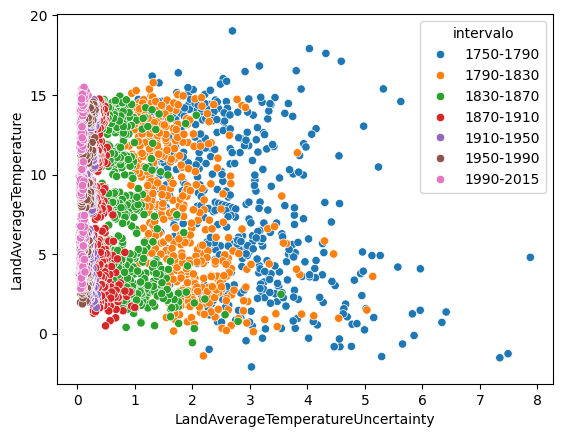

In [48]:
feature="LandAverageTemperature"
plot_scatterplot_by_year(
    data=globalT, 
    feature=feature,
    ystep=40
    )

count_interval
16    483
14    474
15    335
Name: count, dtype: int64


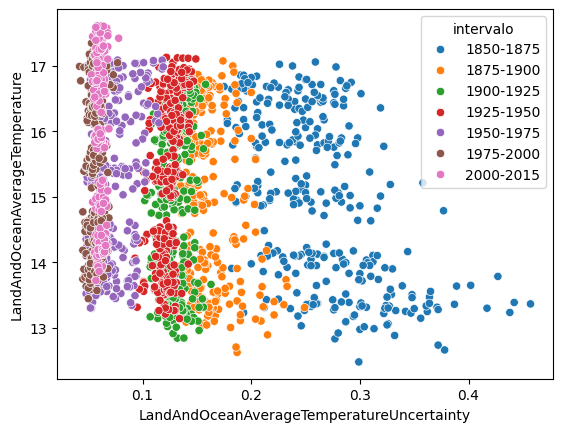

In [49]:
feature="LandAndOceanAverageTemperature"
plot_scatterplot_by_year(
    data=globalT["1850":], 
    feature=feature,
    ystart=1850,
    count=True,
    count_interval=[8,14, 14.8, 16],
    count_labels=["14", "15", "16"]
    )

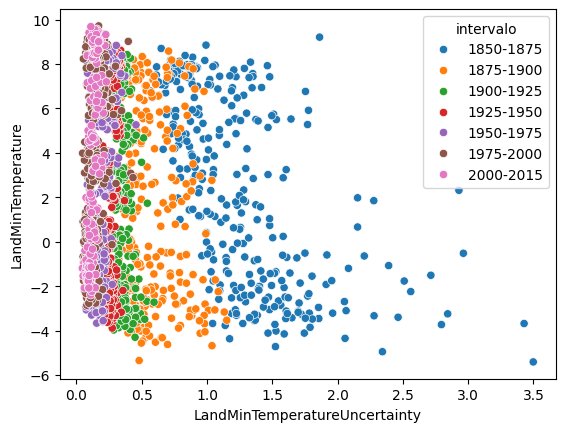

In [50]:
feature="LandMinTemperature"
plot_scatterplot_by_year(
    data=globalT["1850":], 
    feature=feature,
    ystart=1850,
)

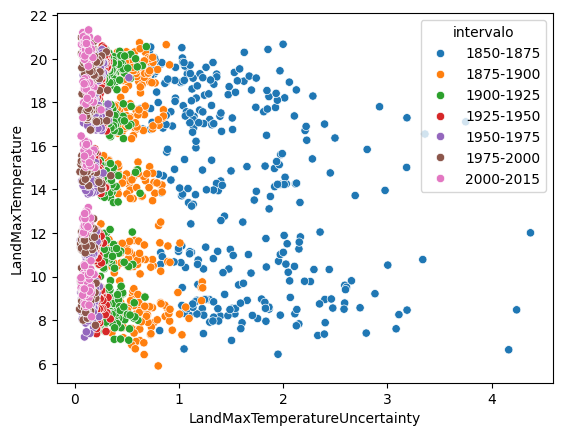

In [51]:
feature="LandMaxTemperature"
plot_scatterplot_by_year(
    data=globalT["1850":], 
    feature=feature,
    ystart=1850,
)

Estos gráficas se ven intresantes. 
- Los datos más fríos, tienen una mayor incertidumbre. Esto es porque cada tramo de tiempo tiene datos de temperatura en cada grupo, pero el primer tramo de tiempo , entre 1750 a 1850, fueron los datos con mayor incertidumbre, es también es cuando la temperatura global no era tanta. Esto hace que la mayoría de los datos fríos son con la mayor incertidumbre. 
- Parecen haber intervalos de temperatura claramente separados según incertidumbre. Esta tendencia parece mantenerse para todos los intervalos de años
- Los datos faltantes en donde hay poca incertidumbre y se ve "grupos" de temperatura, si se hace un modelo de predicción, podría tener problemas para predecir datos en la inflexión.
- cada grupo parece tener una tendencia central con una pequeña cola a la izquierda. Esto es 
porque los datos en la base son los datos más recientes, y de mayor temperatura, lo que justifica la tendencia del desplazamiento de las mediciones más a la izquierda en la base por el aumento de temperatura.

Se observa en cada gráfica un total de 5 grupos. Esto quiere decir que en cada año hay 5 puntos de temperatura comunes $\pm$ un intervalo

Especulo que la razón detrás de los espacios entre medio de cada grupo, habiendo incluso, partes sin datos, es debido a que los datos corresponden a promedios de cada mes. Esto provocaría que se absorba o pierda las temperaturas extremas de cada mes, lo que crea 5 medianas, y por lo tanto un **sesgo**. Calcular el promedio de cada mes haría que se pierda la continuidad de la distribución de las temperaturas.


In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

def uncertainty_by_TempAverageYear(data, feature):
    df=data.copy()

    # se obtienen la tendencia
    descompose_T = seasonal_decompose(
        x=df[feature],
        model="additive",
        period=12
    )
    decompose_U = seasonal_decompose( # U de Uncertainty
        x=df[f"{feature}Uncertainty"],
        model="additive",
        period=12
    )
    # se resumen la tendencia por cada 12 meses, media de un año
    T = descompose_T.trend.dropna().groupby(lambda x: x.year, sort=True).mean()
    U = decompose_U.trend.dropna().groupby(lambda x: x.year, sort=True).mean().abs()

    fig, ax = plt.subplots(figsize=(9, 4))
    ax.fill_between(T.index, T-U, T+U, color=(0.20, 0.45, 0.90, 0.18), linewidth=0)

    seaborn.lineplot(T + U, color=(0.20, 0.45, 0.50))
    seaborn.lineplot(T)
    seaborn.lineplot(T - U, color=(0.20, 0.45, 0.50))
    # pass

A continuación, se hace una gráfica para ver cómo varía la temperatura a lo largo de los años $\pm$ la incertidumbre. 
Si bien la tendencia de temperatura va aumentando, también la precisión, lo cual es un pronóstico preocupante.

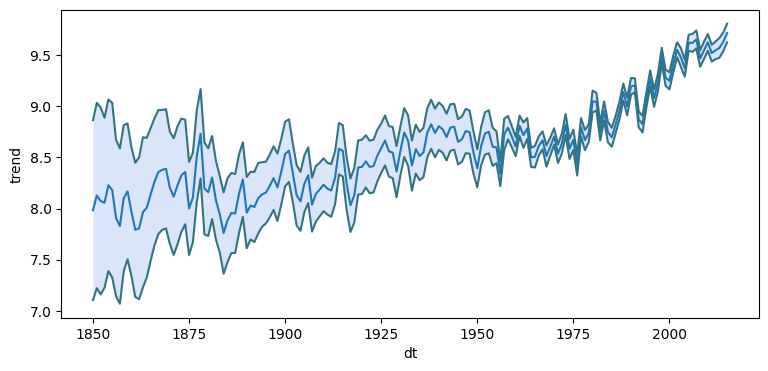

In [53]:
uncertainty_by_TempAverageYear(
    data=globalT["1850":],
    feature="LandAverageTemperature"
)

A continuación se realiza el diagrama de correlación. El análisis de este gráfico de corrrelación se hace en la siguiente sección. 

<Axes: >

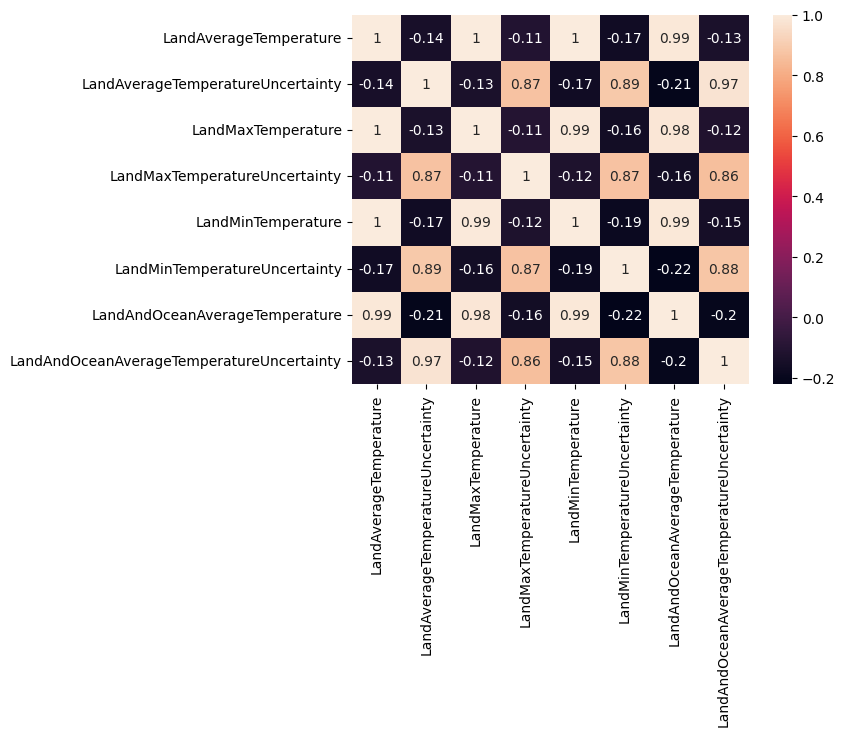

In [54]:
seaborn.heatmap(globalT["1850":].corr(numeric_only=True), annot=True)

# Análisis de correlación

Este gráfico básicamente solo confirma lo que ya veníamos viendo, que básicamente, todos los datos de temperatura aportan la misma información, porque las correlaciones son super áltas, y en otros gráficos se veía que tenían el mismo comportamiento.
- Al tener la correlación muy alta, significa que están aportando la misma información, y que una variable se puede explicar a partir de la otra.
- Se pueden eliminar las variables, primero, las de incertidumbre, ya que no son relevantes, y se correlacionan entre ellas mismas. Y en segundo, las variables de temperatura y solo dejar una, ya que aportan la misma información, y básicamente la correlación es 1 entre ellas.
- La variable más adecuada para dejar, sería la **LandAverageTemperature** ya que tiene más tiempo e historia, o más **contexto**. La segunda opción sería **LandAndOceanAverageTemperature** ya que esta incluye datos marítimos, esta tendría la ventaja de que tiene más mediciones promediadas ya que se incluyen mediciones de **tierra y mar**, lo que sería más confiable (**menos incertidumbre**). Solo hay que dejar una de estas, ya que básicamente aporta la misma información, según lo que se requiera, se puede preferir una por sobre la otra. Ahora en caso de que se quiera saber la temperatura mínima, o máxima, se pueden usar las variables correspondientes, pero no será necesario usar las demás, solo una.

# Conclusiones

- Se encontraron `1200 NA estructurales` por feature, ya que no se habían medido en el rango de tiempo `1750 a 1850`, y se midieron desde `1850`. Las features corresponden a LandMaxTemperature, LandMaxTemperatureUncertainty, LandMinTemperature, LandMinTemperatureUncertainty, LandAndOceanAverageTemperature, LandAndOceanAverageTemperatureUncertainty
- Se ecnontraron `12 NA` faltantes entre el periodo de `1750 a 1850` para las features LandAverageTemperature, LandAverageTemperatureUncertainty. Estas son pocas, pertenecen a un periodo de hace mucho tiempo,y son de alta incertidumbre, podrían haberse descartado simplemente sin afectar mucho. Sin embargo, se realizó una interpolación lineal de tiempo para rellenarlos.
- Las variables más relevantes corresponden a las variables de temperatura y no las de incertidumbre ,ya que estas aportan información relevante para realizar predicciones.
- Se encontraron outliers, pero son pocos, y son de las variables de incertidumbre, por lo que no tienen ningún impacto por la relevancia de estas variables. Estas van disminuyendo con el tiempo, lo que indica una mejora de los métodos y tecnologías de medición.
- No se encuentran outliers para las variables de temperatura. Esto indica un buen ajuste de los datos de temperatura independiente de la incertidumbre.
- Los outliers de las incertidumbres podrían usarse para relacionarlos con eventos específicos que podrían afectar a la temperatura global.
- El resduo o el error de las tendencias se muetran como ruido blanco, lo que representa que para la descomposición y los gráficos que marcan las tendencias, como el boxplot y distribución, explican bien la serie de tiempo, y que el error es completamente aleatorio o causado por eventos, pero este básicamente no se puede predecir.
- Se observa que la temperatura tienen una tendencia creciente, en tódos los gráficos como boxplot, densidades, el de descomposición. 
- Todas las variables de incertidumbre se correlacionan, pero pueden ser descartadas, ya que puede carecer de información para predecir temperaturas. Solo entrega información de qué tan confiable fue el dato medido.
- Todas las variables de temperatura se correlacionan dando casi 1. Estas pueden ser descartadas solo con una variable debe ser suficiente para poder predecir la temperatura.

La temperatura global tiene un incremento considerable y es bastante preocupante. Es necesario acciones oportunas para controlar este fenómeno, ver qué impacto tiene la misma naturaleza y el factor humano.


Qué podría ser investigado con modelos de machine learning, considerando estos datos?
- Predecir la temperatura global promedio de los proximos años dado estos datos históricos
- Vincular los outliers con eventos históricos, lo que podría permitir encotnrar otros patrones relacionado al tipo de evento, por ejemplo erupción de volcanes, pero también con datos de temperatura más locales, por ciudades, o países.
- Se podría predecir anomalías, y si existen patrones previos a estos.
- Se podría validar estos datos con otros datasets, como con dataset de liberación de CO2 y ver su impacto en la temperatura.
- Se podría relacionar el crecimiento de temperatura global vs el el crecimiento del tamaño de ciertas industrias.
- Se podría relacionar el impacto del incremento de la temperatura con el aporte de cada país a este cambio. Categorizándose por nivel de desarrollo, PIB, industrias predominantes, etc.